3.102283690510356


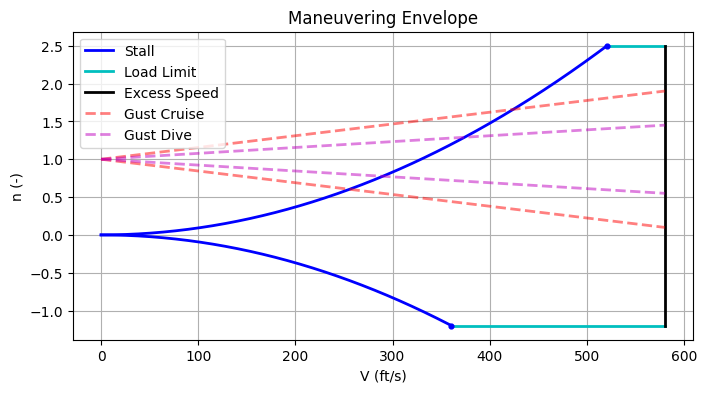

Max Dive Velocity: 580.1846875


In [20]:
import numpy as np
import matplotlib.pyplot as plt

cruiseV = 275 * 1.68781 # knots converted to ft/s
maxV = 1.25 * cruiseV  # ft/s, the maximum allowable velocity value to plot to
N = 500     # the number of points in the arrays that are plotted

V = np.linspace(0, maxV, N)
rho = 10.66e-4 # slug / ft^3
cl_max = 1.2
ws = 69.4
n_stall = (0.5*rho*(V**2)*cl_max)/ws
loadConstant = (0.5*rho*cl_max)/ws
print(n_stall[N-1])

# Positive and Negative Load based on FAR 25 requirements
pos_limitLoad = np.array([2.5, 2.5])
neg_limitLoad = np.array([-1.2, -1.2])

# Solve for V in 'n_stall' equation to get the intersect with horizontal lines from above
pos_intersect_index = int(((np.sqrt(2.5 / loadConstant)) / maxV) * N)
neg_intersect_index = int(((np.sqrt(1.2 / loadConstant)) / maxV) * N)
pos_intersect = V[pos_intersect_index]
neg_intersect = V[neg_intersect_index]
pos_limitV = np.array([pos_intersect, maxV])
neg_limitV = np.array([neg_intersect, maxV])
# plt.plot(pos_limitV, pos_limitLoad) will plot a horizontal line because each dataset contains two points (x,y)

# Update Velocity and Load arrays to be cutoff after intersection
V_upper = V[:pos_intersect_index]
n_stall_upper = n_stall[:pos_intersect_index]
V_lower = V[:neg_intersect_index]
n_stall_lower = -n_stall[:neg_intersect_index]

V_gust = np.linspace(0, maxV, N)
a = 2*np.pi # lift slope
c = 7.6 # mean chord length of wing
miu_g = (2*ws)/(rho*a*c*32.2)
k_g = (0.88*miu_g)/(miu_g + 5.3)
U_de = 38.857142857142854               # ft/s, gust speed at 25k ft, found with linear interpolation
cruiseConstant = (rho*a*k_g*U_de)/(2*ws)
n_gustcruisepos = 1 + cruiseConstant*V_gust
n_gustcruiseneg = 1 - cruiseConstant*V_gust
V_dive = np.linspace(0, maxV, N)
diveConstant = 0.5*cruiseConstant
n_gustdivepos = 1 + diveConstant*V_dive
n_gustdiveneg = 1 - diveConstant*V_dive

plt.figure(figsize=(8,4))
plt.title('Maneuvering Envelope')
plt.xlabel("V (ft/s)")
plt.ylabel("n (-)")
plt.plot(V_upper, n_stall_upper, label='Stall', linestyle='-', linewidth=2, marker=None, markersize=8, color='b')
plt.plot(V_lower, n_stall_lower, linestyle='-', linewidth=2, marker=None, markersize=8, color='b')
plt.plot(pos_limitV, pos_limitLoad, label='Load Limit', linestyle='-', linewidth=2, marker=None, markersize=8, color='c')
plt.plot(neg_limitV, neg_limitLoad, linestyle='-', linewidth=2, marker=None, markersize=8, color='c')
plt.scatter(pos_limitV[0], pos_limitLoad[0],s=12, color='b', zorder=2)
plt.scatter(neg_limitV[0], neg_limitLoad[0],s=12, color='b', zorder=2)
plt.plot(maxV*np.ones(N),np.linspace(-1.2,2.5,N), label='Excess Speed', linestyle='-', linewidth=2, marker=None, markersize=8, color='k')
# plt.plot(cruiseV*np.ones(N),np.linspace(-1.2,2.5,N), label='Cruise Speed', linestyle='-', linewidth=2, marker=None, markersize=8, color='g')
plt.plot(V_gust, n_gustcruisepos, label='Gust Cruise', linestyle='--', linewidth=2, marker=None, markersize=8, color='r', alpha=0.5)
plt.plot(V_gust, n_gustcruiseneg, linestyle='--', linewidth=2, marker=None, markersize=8, color='r', alpha=0.5)
plt.plot(V_dive, n_gustdivepos, label='Gust Dive', linestyle='--', linewidth=2, marker=None, markersize=8, color='m', alpha=0.5)
plt.plot(V_dive, n_gustdiveneg, linestyle='--', linewidth=2, marker=None, markersize=8, color='m', alpha=0.5)
plt.grid(True)
plt.legend(loc='best')
plt.show()

The gust lines do not pose an additional restriction to the flight envelope. Therefore, no changes are required and we have found our flight envelope!

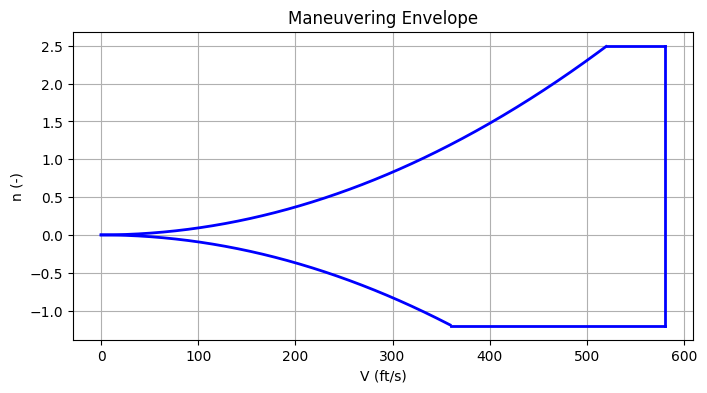

Max Dive Velocity: 580.1846875 ft/s


In [22]:
plt.figure(figsize=(8,4))
plt.title('Maneuvering Envelope')
plt.xlabel("V (ft/s)")
plt.ylabel("n (-)")
plt.plot(V_upper, n_stall_upper, label='Stall', linestyle='-', linewidth=2, marker=None, markersize=8, color='b')
plt.plot(V_lower, n_stall_lower, linestyle='-', linewidth=2, marker=None, markersize=8, color='b')
plt.plot(pos_limitV, pos_limitLoad, label='Load Limit', linestyle='-', linewidth=2, marker=None, markersize=8, color='b')
plt.plot(neg_limitV, neg_limitLoad, linestyle='-', linewidth=2, marker=None, markersize=8, color='b')
# plt.scatter(pos_limitV[0], pos_limitLoad[0],s=12, color='b', zorder=2)
# plt.scatter(neg_limitV[0], neg_limitLoad[0],s=12, color='b', zorder=2)
plt.plot(maxV*np.ones(N),np.linspace(-1.2,2.5,N), label='Excess Speed', linestyle='-', linewidth=2, marker=None, markersize=8, color='b')
plt.grid(True)
plt.show()
print("Max Dive Velocity:", maxV, "ft/s")